In [96]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [97]:
url = "http://localhost:8000/tfjs_example/"
def edge_test(n=10, backend="wasm", arguments=[]):
    option = webdriver.EdgeOptions()
    option.add_argument("headless")
    option.add_argument("--enable-javascript")
    option.add_argument("--use-gl")
    driver = webdriver.Edge(options = option)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n})')
    driver.quit()
    return data
def chrome_test(n=10, backend="wasm", arguments=[]):
    option = webdriver.ChromeOptions()
    option.add_argument("headless")
    option.add_argument("--enable-javascript")
    option.add_argument("--use-gl")
    driver = webdriver.Chrome(options = option)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n})')
    driver.quit()
    return data
def firefox_test(n=10, backend="wasm", arguments=[]):
    option = webdriver.FirefoxOptions()
    option.add_argument('-headless')
    # option.add_argument("--enable-javascript")
    # option.add_argument("--use-gl")
    driver = webdriver.Firefox(options = option)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n})')
    driver.quit()
    return data

In [98]:
edge_data = []
for i in tqdm(range(10), "edge test"):
    edge_data += edge_test()

edge test: 100%|██████████| 10/10 [01:46<00:00, 10.65s/it]


In [99]:
chrome_data = []
for i in tqdm(range(10), "chrome test"):
    chrome_data += chrome_test()

chrome test: 100%|██████████| 10/10 [01:43<00:00, 10.40s/it]


In [100]:
firefox_data = []
for i in tqdm(range(10), "firefox test"):
    firefox_data += firefox_test()

firefox test: 100%|██████████| 10/10 [02:23<00:00, 14.33s/it]


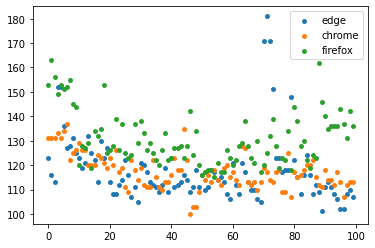

In [101]:
plt.scatter(range(len(edge_data)), edge_data, s=15, label="edge")
plt.scatter(range(len(chrome_data)), chrome_data, s=15, label="chrome")
plt.scatter(range(len(firefox_data)), firefox_data, s=15, label="firefox")
plt.legend()

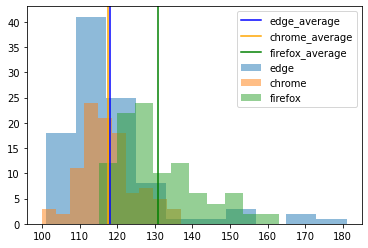

In [103]:
plt.hist(edge_data, alpha=.5, bins=10, label="edge")
plt.hist(chrome_data, alpha=.5, bins=10, label="chrome")
plt.hist(firefox_data, alpha=.5, bins=10, label="firefox")
plt.axvline(sum(edge_data)/len(edge_data), c="b", label="edge_average")
plt.axvline(sum(chrome_data)/len(chrome_data), c="orange", label="chrome_average")
plt.axvline(sum(firefox_data)/len(firefox_data), c="g", label="firefox_average")
plt.legend()